<a href="https://www.kaggle.com/code/nortonperez/csci-331-digit-recognizer-notebook?scriptVersionId=154315813" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Digit Recognizer
------------------
## 1. Importing important modules to train model

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import os
print("Working directory: "+ os.getcwd())
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print("\t" + os.path.join(dirname, filename))

Working directory: /kaggle/working
	/kaggle/input/digit-recognizer/sample_submission.csv
	/kaggle/input/digit-recognizer/train.csv
	/kaggle/input/digit-recognizer/test.csv


We have 3 important files that will provide help in training, testing, and formating the results of a model.

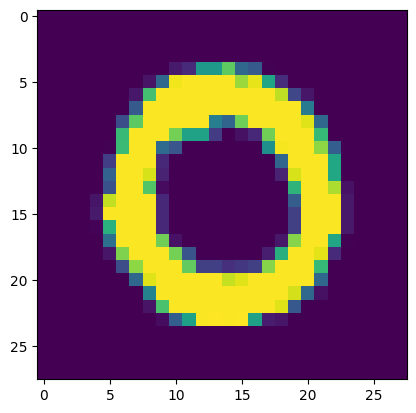

In [2]:
trainDataFrame = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
pixelView = np.asarray(trainDataFrame.iloc[1,1:]).reshape(28,28)
plt.imshow(pixelView)